In [155]:
# import packages
import pandas as pd
import numpy as np

In [156]:
# import the file and check it
survey = pd.read_csv('Fidelity Investment Life.csv')
survey.head()

,Timestamp,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,Question 11,Question 12,Question 13,Question 14,Question 15,Question 16,Question 17,Question 18,Question 19
0,2019/10/21 5:24:00 PM EST,Graduate program,24,Business related majors,Yes,Female,I already have investments,Fund;Insurance,Rates of return,Friends recommend;Bank recommend(Text messages...,No,No,3,Yes,Webinar,Partially,No,$1000 - $ 2000,$500 - $1000,<5%
1,2019/10/21 5:25:00 PM EST,Graduate program,25,STEM majors,Yes,Male,No,Insurance;Saving account,Rates of return;Easy entrance;Easy management,Social media/Youtube;Friends recommend;Online ...,Yes,Yes,2,Yes,Webinar;Investment mobile app;Youtube tutorials,Yes,Yes,< $500,< $500,15% - 20%
2,2019/10/21 5:25:05 PM EST,Graduate program,23,STEM majors,Yes,Female,Yes,Saving account,Rates of return;Risk manageable;Easy entrance;...,Social media/Youtube,Yes,Yes,4,Yes,Seminar;Investment mobile app,No,No,$500 - $1000,$500 - $1000,<5%
3,2019/10/21 5:29:30 PM EST,Graduate program,23,STEM majors,Yes,Female,Maybe,Insurance;Saving account,Rates of return;Easy entrance;Easy management,Friends recommend;Bank recommend(Text messages...,Yes,Not Sure,2,Yes,Youtube tutorials;Social media influencers,No,No,< $500,$1000 - $2000,5% - 10%
4,2019/10/21 6:12:17 PM EST,Senior,21,"Literature, language and social science majors",Yes,Female,No,Not interested at all,Easy management,Newspaper/magazine;Bank recommend(Text message...,Yes,Yes,1,Yes,Webinar;Youtube tutorials,Yes,No,$500 - $1000,< $500,5% - 10%


### DATA PREPERATION

In [157]:
#remove the Timestamp
survey = survey.drop(['Timestamp'], axis = 1)
survey.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,Question 11,Question 12,Question 13,Question 14,Question 15,Question 16,Question 17,Question 18,Question 19
0,Graduate program,24,Business related majors,Yes,Female,I already have investments,Fund;Insurance,Rates of return,Friends recommend;Bank recommend(Text messages...,No,No,3,Yes,Webinar,Partially,No,$1000 - $ 2000,$500 - $1000,<5%
1,Graduate program,25,STEM majors,Yes,Male,No,Insurance;Saving account,Rates of return;Easy entrance;Easy management,Social media/Youtube;Friends recommend;Online ...,Yes,Yes,2,Yes,Webinar;Investment mobile app;Youtube tutorials,Yes,Yes,< $500,< $500,15% - 20%
2,Graduate program,23,STEM majors,Yes,Female,Yes,Saving account,Rates of return;Risk manageable;Easy entrance;...,Social media/Youtube,Yes,Yes,4,Yes,Seminar;Investment mobile app,No,No,$500 - $1000,$500 - $1000,<5%
3,Graduate program,23,STEM majors,Yes,Female,Maybe,Insurance;Saving account,Rates of return;Easy entrance;Easy management,Friends recommend;Bank recommend(Text messages...,Yes,Not Sure,2,Yes,Youtube tutorials;Social media influencers,No,No,< $500,$1000 - $2000,5% - 10%
4,Senior,21,"Literature, language and social science majors",Yes,Female,No,Not interested at all,Easy management,Newspaper/magazine;Bank recommend(Text message...,Yes,Yes,1,Yes,Webinar;Youtube tutorials,Yes,No,$500 - $1000,< $500,5% - 10%


In [158]:
# check the types
survey.dtypes

Question 1     object
Question 2      int64
Question 3     object
Question 4     object
Question 5     object
Question 6     object
Question 7     object
Question 8     object
Question 9     object
Question 10    object
Question 11    object
Question 12     int64
Question 13    object
Question 14    object
Question 15    object
Question 16    object
Question 17    object
Question 18    object
Question 19    object
dtype: object

In [159]:
# to check if there is any data needs to be cleaned up
survey[survey.isnull().any(axis = 1)]

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,Question 11,Question 12,Question 13,Question 14,Question 15,Question 16,Question 17,Question 18,Question 19
42,Sophomore,20,Business related majors,No,Female,Maybe,Stock,Easy management,Newspaper/magazine,No,Not Sure,1,Yes,Seminar;Investment mobile app,Yes,No,NaN,NaN,NaN
71,Junior,21,"Literature, language and social science majors",Yes,Female,Maybe,Stock;Bond;Insurance;Saving account,Risk manageable;Easy entrance;Easy management,Newspaper/magazine;Social media/Youtube;Friend...,Yes,Not Sure,1,Yes,Seminar;Investment mobile app;Youtube tutorial...,Partially,Yes,NaN,NaN,NaN


In [160]:
# check the most common answers for Q17 Q18 and Q19
print(survey['Question 17'].value_counts())
print(survey['Question 18'].value_counts())
print(survey['Question 19'].value_counts())

< $500            36
$500 - $1000      22
$1000 - $ 2000    14
$2000 - $3000      1
> $3000            1
Name: Question 17, dtype: int64
< $500           34
$500 - $1000     29
$1000 - $2000     9
> $3000           2
Name: Question 18, dtype: int64
5% - 10%     24
<5%          22
10% - 15%    18
15% - 20%     7
>20%          3
Name: Question 19, dtype: int64


In [161]:
# replace the missing values with most popular answers
survey = survey.fillna({'Question 17': '< $500','Question 18': '$500 - $1000','Question 19': '<5%'})
# check the result
survey[survey.isnull().any(axis = 1)]

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,Question 11,Question 12,Question 13,Question 14,Question 15,Question 16,Question 17,Question 18,Question 19


In [162]:
# get the dummy variables for the applicable columns (simple choice questions)
dummy_survey = pd.get_dummies(survey, columns = ['Question 1', 'Question 3','Question 4','Question 5',
                                 'Question 6','Question 10','Question 11','Question 13',
                                 'Question 15','Question 16','Question 17',
                                 'Question 18','Question 19'],
               prefix=['year','major','international','gender','invest','retire','emergency',
                      'education','dependence','loan','income','expenditures','percent'])

In [163]:
# check if the interest product is high return rate
def interest_condition():
    return survey['Question 7'].str.contains('Bond'or'Stock')

In [164]:
# make the interest column as two categories: 1 - high return rate and 2 - low return rate
dummy_survey['interest_products'] = np.where(interest_condition(), 1, 0)

In [165]:
# get the dummy variables for the mutiple choices questions
dummy_survey['factor_return'] = np.where(survey['Question 8'].str.contains('Rates of return'), 1, 0)
dummy_survey['factor_risk'] = np.where(survey['Question 8'].str.contains('Risk manageable'), 1, 0)
dummy_survey['factor_entrance'] = np.where(survey['Question 8'].str.contains('Easy entrance'), 1, 0)
dummy_survey['factor_management'] = np.where(survey['Question 8'].str.contains('Easy management'), 1, 0)
dummy_survey['factor_others'] = np.where(survey['Question 8'].str.contains('Others'), 1, 0)

In [166]:
# get the dummy variables for the mutiple choices questions
dummy_survey['obtain_newspaper'] = np.where(survey['Question 9'].str.contains('Newspaper/magazine'), 1, 0)
dummy_survey['obtain_social'] = np.where(survey['Question 9'].str.contains('Social media/Youtube'), 1, 0)
dummy_survey['obtain_friends'] = np.where(survey['Question 9'].str.contains('Friends recommend'), 1, 0)
dummy_survey['obtain_ad'] = np.where(survey['Question 9'].str.contains('Online advertisements'), 1, 0)
dummy_survey['obtain_tv'] = np.where(survey['Question 9'].str.contains('TV'), 1, 0)
dummy_survey['obtain_bank'] = np.where(survey['Question 9'].str.contains('Bank recommend'), 1, 0)
dummy_survey['obtain_family'] = np.where(survey['Question 9'].str.contains('Parents/family members'), 1, 0)
dummy_survey['obtain_Other'] = np.where(survey['Question 9'].str.contains('Other'), 1, 0)

In [167]:
# get the dummy variables for the mutiple choices questions
dummy_survey['educate_seminar'] = np.where(survey['Question 14'].str.contains('Seminar'), 1, 0)
dummy_survey['educate_webinar'] = np.where(survey['Question 14'].str.contains('Webinar'), 1, 0)
dummy_survey['educate_app'] = np.where(survey['Question 14'].str.contains('Investment mobile app'), 1, 0)
dummy_survey['educate_youtube'] = np.where(survey['Question 14'].str.contains('Youtube tutorials'), 1, 0)
dummy_survey['educate_sms'] = np.where(survey['Question 14'].str.contains('Social media influencers'), 1, 0)
dummy_survey['educate_notsure'] = np.where(survey['Question 14'].str.contains('Not Sure'), 1, 0)

In [168]:
# drop the columns
dummy_survey = dummy_survey.drop(['Question 7','Question 8','Question 9', 'Question 14'], axis = 1)
dummy_survey.head()

,Question 2,Question 12,year_Freshman,year_Graduate program,year_Junior,year_Senior,year_Sophomore,major_Business related majors,major_Economics,major_History,...,obtain_tv,obtain_bank,obtain_family,obtain_Other,educate_seminar,educate_webinar,educate_app,educate_youtube,educate_sms,educate_notsure
0,24,3,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,25,2,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0
2,23,4,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,23,2,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
4,21,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [169]:
# normalize the age and ranking
from sklearn import preprocessing
q2 = dummy_survey[['Question 2']]
min_max_scaler = preprocessing.MinMaxScaler()
q2 = min_max_scaler.fit_transform(q2)
dummy_survey['Question 2'] = q2

q12 = dummy_survey[['Question 12']]
min_max_scaler = preprocessing.MinMaxScaler()
q12 = min_max_scaler.fit_transform(q12)
dummy_survey['Question 12'] = q12

dummy_survey.head()

,Question 2,Question 12,year_Freshman,year_Graduate program,year_Junior,year_Senior,year_Sophomore,major_Business related majors,major_Economics,major_History,...,obtain_tv,obtain_bank,obtain_family,obtain_Other,educate_seminar,educate_webinar,educate_app,educate_youtube,educate_sms,educate_notsure
0,0.066667,0.50,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0.077778,0.25,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0
2,0.055556,0.75,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0.055556,0.25,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
4,0.033333,0.00,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


## CHECK THE CORRELATION

In [170]:
# correlation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
cor_forselection = dummy_survey.corr()
cor = cor_forselection
cor_forselection

,Question 2,Question 12,year_Freshman,year_Graduate program,year_Junior,year_Senior,year_Sophomore,major_Business related majors,major_Economics,major_History,...,obtain_tv,obtain_bank,obtain_family,obtain_Other,educate_seminar,educate_webinar,educate_app,educate_youtube,educate_sms,educate_notsure
Question 2,1.000000,0.291468,-0.127417,0.275442,-0.119725,-0.060896,-0.121243,-0.056571,-0.011908,-0.034821,...,-0.068398,-0.073621,-0.084106,NaN,-0.139371,-0.101536,-0.090165,0.163135,-0.038904,-0.067649
Question 12,0.291468,1.000000,0.001989,0.297545,-0.202631,-0.029986,-0.181818,0.064746,-0.064896,0.044706,...,-0.018216,0.091932,-0.059394,NaN,-0.045051,-0.161509,0.046931,-0.077263,-0.041544,-0.122631
year_Freshman,-0.127417,0.001989,1.000000,-0.272450,-0.126103,-0.091022,-0.103296,-0.059286,-0.030643,-0.030643,...,0.041682,0.056245,0.048076,NaN,0.002857,-0.004263,0.081461,-0.272450,0.010809,0.161348
year_Graduate program,0.275442,0.297545,-0.272450,1.000000,-0.487865,-0.352145,-0.399631,0.011310,-0.118550,-0.118550,...,0.026581,0.011310,0.095383,NaN,-0.290543,-0.155766,0.188090,0.051975,0.191214,-0.186733
year_Junior,-0.119725,-0.202631,-0.126103,-0.487865,1.000000,-0.162989,-0.184968,-0.091383,0.242997,-0.054870,...,-0.099011,-0.165267,-0.176787,NaN,0.241215,0.158126,-0.222755,-0.080417,-0.138249,0.144696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
educate_webinar,-0.101536,-0.161509,-0.004263,-0.155766,0.158126,0.151526,-0.085458,0.036042,0.139122,0.139122,...,-0.113146,0.094323,0.184925,NaN,0.260905,1.000000,0.007085,0.058500,-0.256273,-0.163723
educate_app,-0.090165,0.046931,0.081461,0.188090,-0.222755,-0.049922,-0.037082,0.040929,-0.103892,0.128338,...,0.081152,0.098532,0.128842,NaN,-0.022795,0.007085,1.000000,0.135146,0.118563,-0.197883
educate_youtube,0.163135,-0.077263,-0.272450,0.051975,-0.080417,0.248308,-0.010247,0.068613,-0.118550,-0.118550,...,0.026581,0.068613,0.095383,NaN,-0.075116,0.058500,0.135146,1.000000,0.055399,-0.256643
educate_sms,-0.038904,-0.041544,0.010809,0.191214,-0.138249,0.058210,-0.184968,0.056385,-0.054870,-0.054870,...,-0.099011,-0.017499,0.042275,NaN,-0.175429,-0.256273,0.118563,0.055399,1.000000,-0.215859


<Figure size 1080x1080 with 0 Axes>

In [171]:
# reset the index
cor.index = (range(0,72))
cor.reindex()
cor

,Question 2,Question 12,year_Freshman,year_Graduate program,year_Junior,year_Senior,year_Sophomore,major_Business related majors,major_Economics,major_History,...,obtain_tv,obtain_bank,obtain_family,obtain_Other,educate_seminar,educate_webinar,educate_app,educate_youtube,educate_sms,educate_notsure
0,1.000000,0.291468,-0.127417,0.275442,-0.119725,-0.060896,-0.121243,-0.056571,-0.011908,-0.034821,...,-0.068398,-0.073621,-0.084106,NaN,-0.139371,-0.101536,-0.090165,0.163135,-0.038904,-0.067649
1,0.291468,1.000000,0.001989,0.297545,-0.202631,-0.029986,-0.181818,0.064746,-0.064896,0.044706,...,-0.018216,0.091932,-0.059394,NaN,-0.045051,-0.161509,0.046931,-0.077263,-0.041544,-0.122631
2,-0.127417,0.001989,1.000000,-0.272450,-0.126103,-0.091022,-0.103296,-0.059286,-0.030643,-0.030643,...,0.041682,0.056245,0.048076,NaN,0.002857,-0.004263,0.081461,-0.272450,0.010809,0.161348
3,0.275442,0.297545,-0.272450,1.000000,-0.487865,-0.352145,-0.399631,0.011310,-0.118550,-0.118550,...,0.026581,0.011310,0.095383,NaN,-0.290543,-0.155766,0.188090,0.051975,0.191214,-0.186733
4,-0.119725,-0.202631,-0.126103,-0.487865,1.000000,-0.162989,-0.184968,-0.091383,0.242997,-0.054870,...,-0.099011,-0.165267,-0.176787,NaN,0.241215,0.158126,-0.222755,-0.080417,-0.138249,0.144696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-0.101536,-0.161509,-0.004263,-0.155766,0.158126,0.151526,-0.085458,0.036042,0.139122,0.139122,...,-0.113146,0.094323,0.184925,NaN,0.260905,1.000000,0.007085,0.058500,-0.256273,-0.163723
68,-0.090165,0.046931,0.081461,0.188090,-0.222755,-0.049922,-0.037082,0.040929,-0.103892,0.128338,...,0.081152,0.098532,0.128842,NaN,-0.022795,0.007085,1.000000,0.135146,0.118563,-0.197883
69,0.163135,-0.077263,-0.272450,0.051975,-0.080417,0.248308,-0.010247,0.068613,-0.118550,-0.118550,...,0.026581,0.068613,0.095383,NaN,-0.075116,0.058500,0.135146,1.000000,0.055399,-0.256643
70,-0.038904,-0.041544,0.010809,0.191214,-0.138249,0.058210,-0.184968,0.056385,-0.054870,-0.054870,...,-0.099011,-0.017499,0.042275,NaN,-0.175429,-0.256273,0.118563,0.055399,1.000000,-0.215859


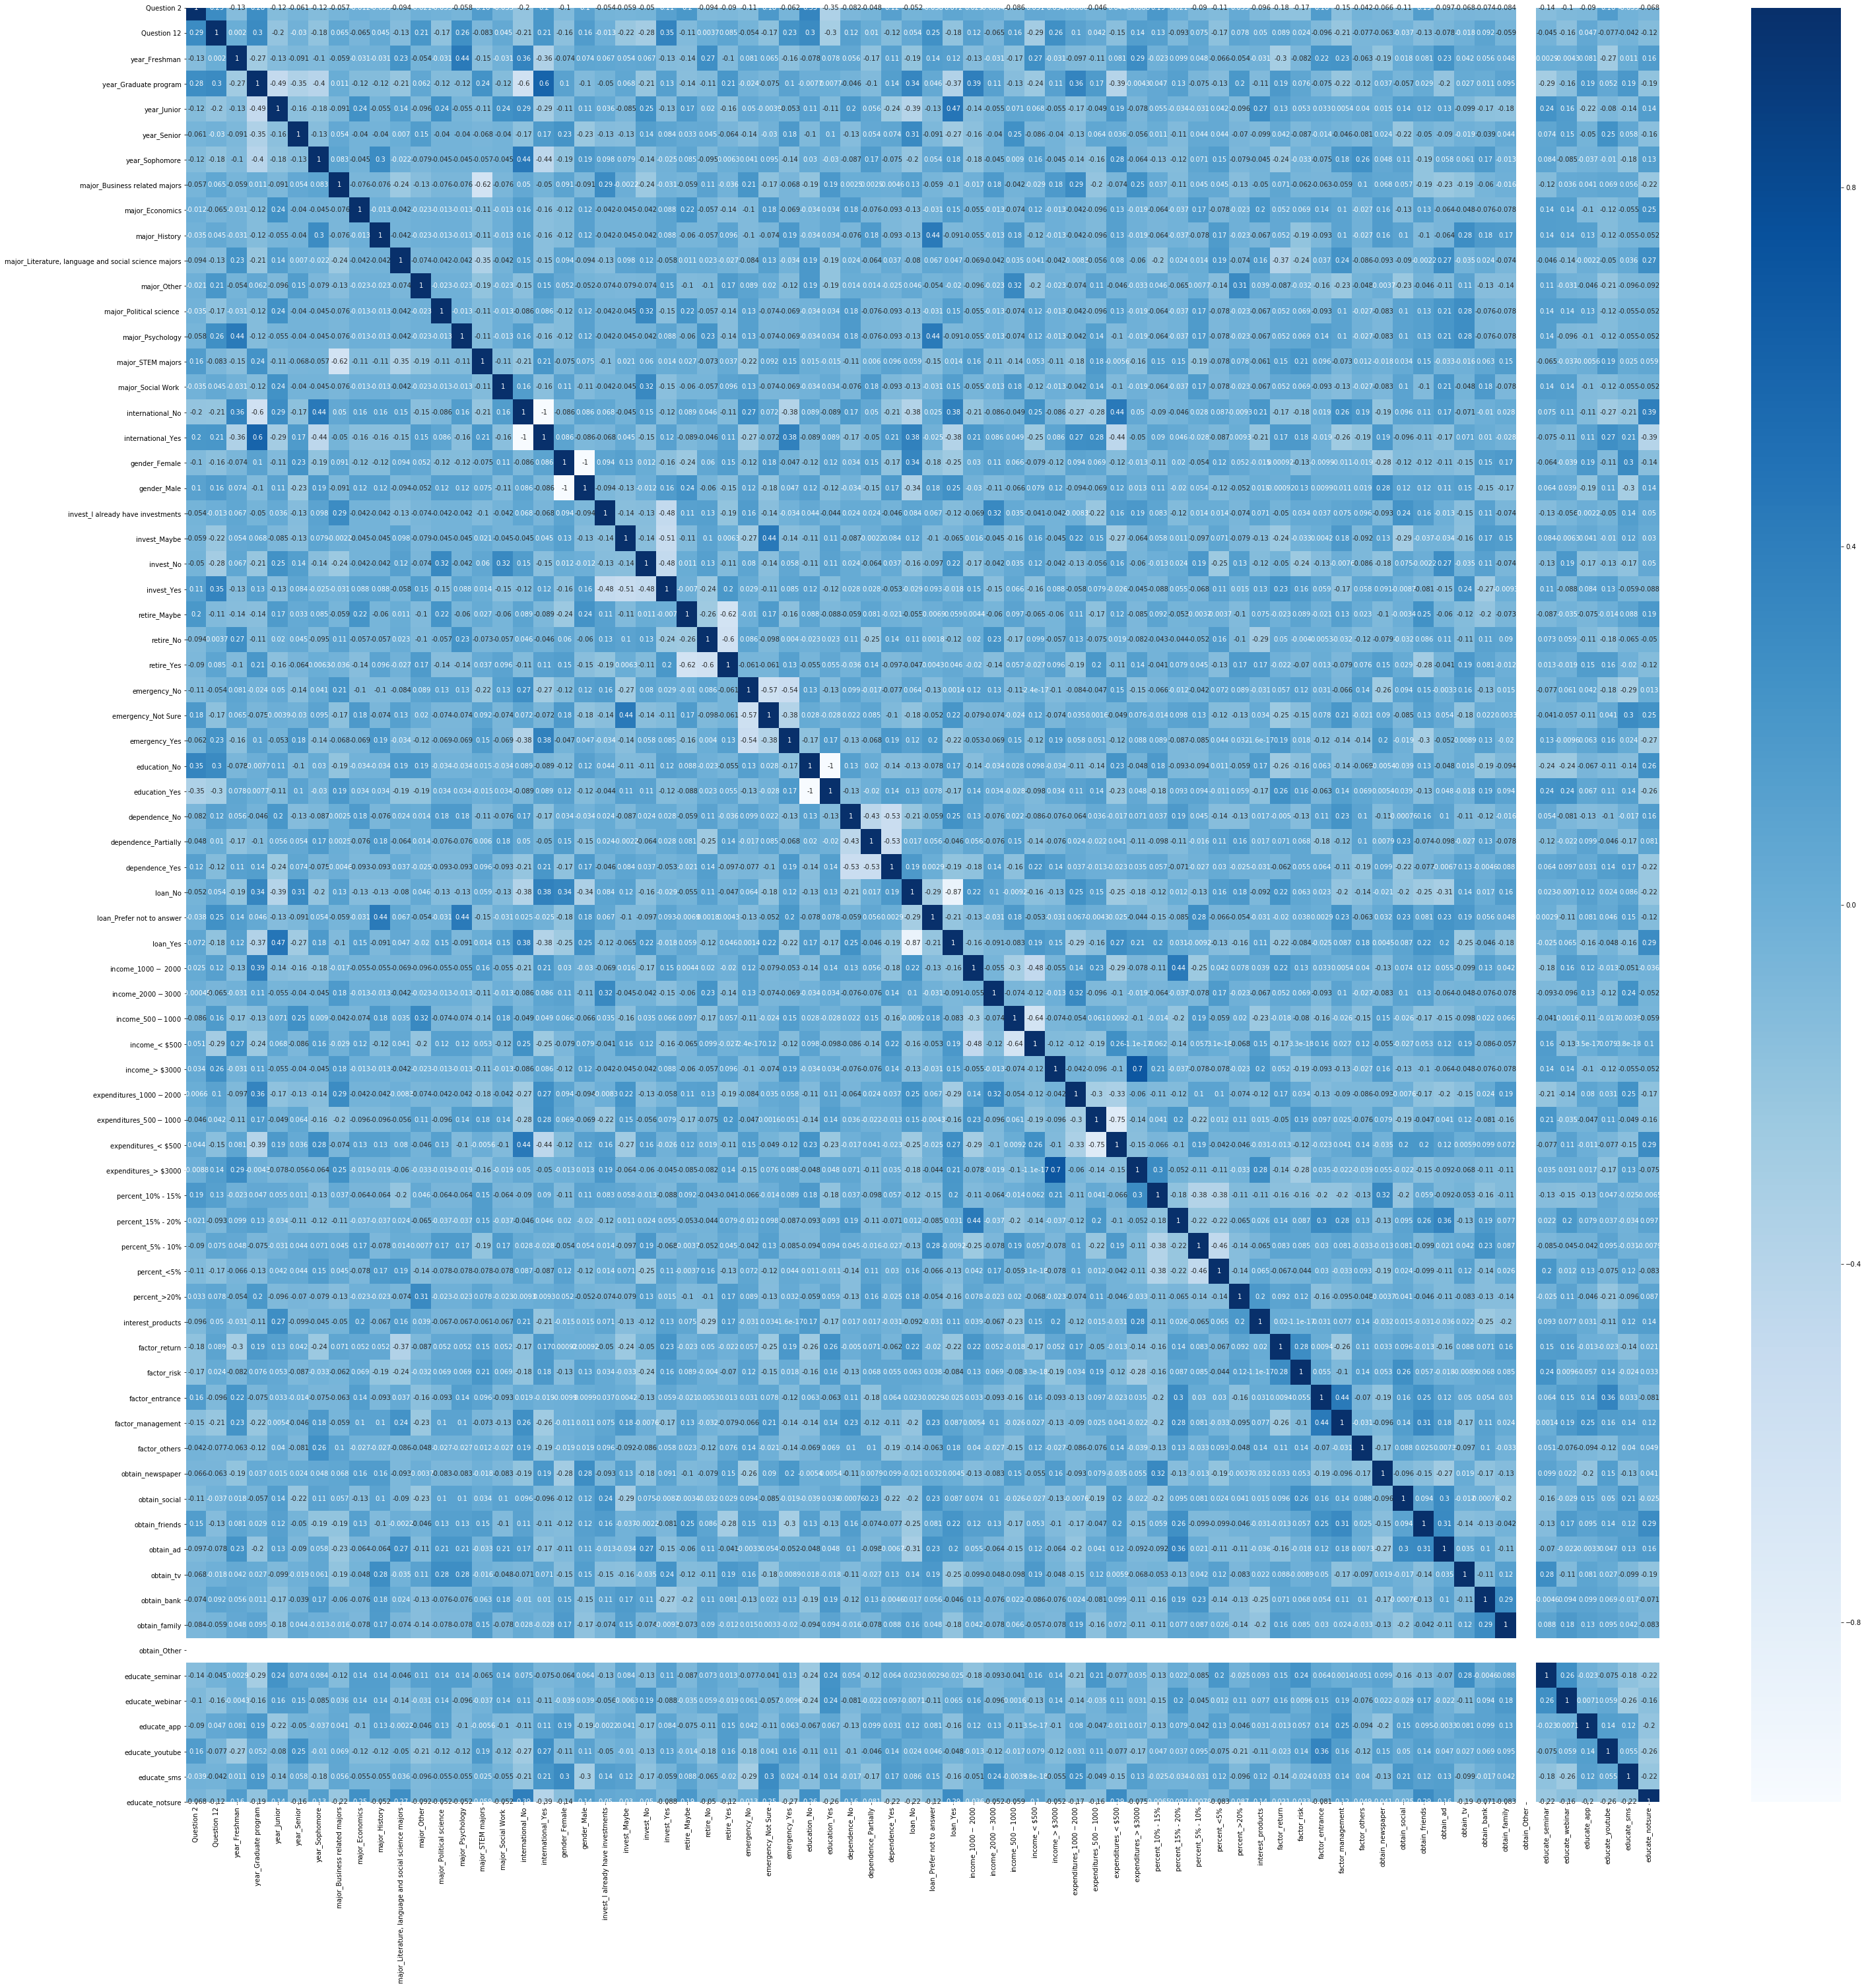

In [172]:
#Using Pearson Correlation to generate heat map
plt.figure(figsize=(50,50))
cor = dummy_survey.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [173]:
# check the highly correlated variables 
for i in range (0,72):
    for j in range(0,72):
        if abs(cor.iloc[i,j]) >= 0.8 and abs(cor.iloc[i,j]) != 1:
            print(i,j,cor.iloc[i,j])

35 37 -0.8730422403536967
37 35 -0.8730422403536967


In [174]:
print(dummy_survey.columns[35],dummy_survey.columns[36],dummy_survey.columns[37])

loan_No loan_Prefer not to answer loan_Yes


In [175]:
# drop the columns which has high correlation
dummy_survey = dummy_survey.drop(dummy_survey.columns[35], axis = 1)
dummy_survey = dummy_survey.drop(dummy_survey.columns[35], axis = 1)

In [176]:
# check if the column has already been dropped
print(dummy_survey.columns[34],dummy_survey.columns[35],dummy_survey.columns[36],dummy_survey.columns[37])

dependence_Yes loan_Yes income_$1000 - $ 2000 income_$2000 - $3000


### feature selection by correlation

In [177]:
# check the correlation between the independent variables and the dependent variables
# feature selection by correlation
features_cor = cor[abs(cor["interest_products"]) >= 0.2]
features_cor

,Question 2,Question 12,year_Freshman,year_Graduate program,year_Junior,year_Senior,year_Sophomore,major_Business related majors,major_Economics,major_History,...,obtain_tv,obtain_bank,obtain_family,obtain_Other,educate_seminar,educate_webinar,educate_app,educate_youtube,educate_sms,educate_notsure
year_Junior,-0.119725,-0.202631,-0.126103,-0.487865,1.000000,-0.162989,-0.184968,-0.091383,0.242997,-0.054870,...,-0.099011,-0.165267,-0.176787,NaN,0.241215,0.158126,-0.222755,-0.080417,-0.138249,0.144696
international_No,-0.199300,-0.208423,0.357497,-0.597091,0.285550,-0.165025,0.443046,0.049609,0.155556,0.155556,...,-0.070944,-0.010237,0.028017,NaN,0.075488,0.111150,-0.114951,-0.267063,-0.210896,0.392918
international_Yes,0.199300,0.208423,-0.357497,0.597091,-0.285550,0.165025,-0.443046,-0.049609,-0.155556,-0.155556,...,0.070944,0.010237,-0.028017,NaN,-0.075488,-0.111150,0.114951,0.267063,0.210896,-0.392918
retire_No,-0.093780,0.003716,0.268452,-0.112265,0.020198,0.045357,-0.095225,0.105102,-0.057260,-0.057260,...,-0.110034,0.105102,0.089837,NaN,0.072973,0.059303,-0.113728,-0.178406,-0.065082,-0.049672
income_$500 - $1000,-0.085976,0.164507,-0.169383,-0.132895,0.070903,0.253760,0.009035,-0.041549,-0.073703,0.180907,...,-0.097652,0.021605,0.065701,NaN,-0.040612,0.001554,-0.107487,-0.016803,-0.003939,-0.058800
expenditures_> $3000,-0.008799,0.141672,0.287938,-0.004328,-0.078121,-0.056388,-0.063992,0.249559,-0.018983,-0.018983,...,-0.067630,-0.108299,-0.111687,NaN,0.035404,0.030811,0.017402,-0.168784,0.133922,-0.074679
interest_products,-0.095720,0.050475,-0.030643,-0.106391,0.274352,-0.099015,-0.044947,-0.049609,0.200000,-0.066667,...,0.021592,-0.248044,-0.196116,NaN,0.093250,0.077290,0.030557,-0.106391,0.117579,0.141220
obtain_bank,-0.073621,0.091932,0.056245,0.011310,-0.165267,-0.039296,0.167231,-0.059885,-0.076067,0.175284,...,-0.108185,1.000000,0.291873,NaN,-0.004626,0.094323,0.098532,0.068613,-0.017499,-0.071058


In [181]:
# check the correlation between the independent variables and the dependent variables
# feature selection by correlation
features_cor = features_cor[abs(features_cor["interest_products"]) >= 0.2]
features_cor = pd.DataFrame(features_cor["interest_products"])
features_cor['features'] = features_cor.index
features_cor.index = range(0,8)
features_cor

,interest_products,features
0,0.274352,year_Junior
1,0.206349,international_No
2,-0.206349,international_Yes
3,-0.286299,retire_No
4,-0.234509,income_$500 - $1000
5,0.284747,expenditures_> $3000
6,1.000000,interest_products
7,-0.248044,obtain_bank


In [182]:
# independent variables (without feature selection)
independent_vars = dummy_survey.drop("interest_products",1) 
#dependent variable
dependent_var = dummy_survey["interest_products"]  

In [183]:
# train test sets split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent_vars,dependent_var, test_size = 0.2, random_state = 200)

### feature selection by embedded method

In [184]:
# embedded method
from sklearn.linear_model import LassoCV, Lasso
lasso_model = LassoCV()
lasso_model.fit(x_train, y_train)
features_lasso = pd.DataFrame(lasso_model.coef_, index = x_train.columns,columns=['coef'])
features_lasso = features_lasso[abs(features_lasso['coef']) > 0]
features_lasso

C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013516823457150329, tolerance: 0.00084
  positive)
C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013388295947638074, tolerance: 0.00084
  positive)


,coef


### feature selection by random forest

In [185]:
# feature importance
from sklearn.metrics import r2_score
from rfpimp import permutation_importances
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
print('R^2 Training Score: {:.2f} \nTest Score: {:.2f}'.format(rf.score(x_train, y_train), rf.score(x_test, y_test))) 


R^2 Training Score: 0.78 
Test Score: 0.11


C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [186]:
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

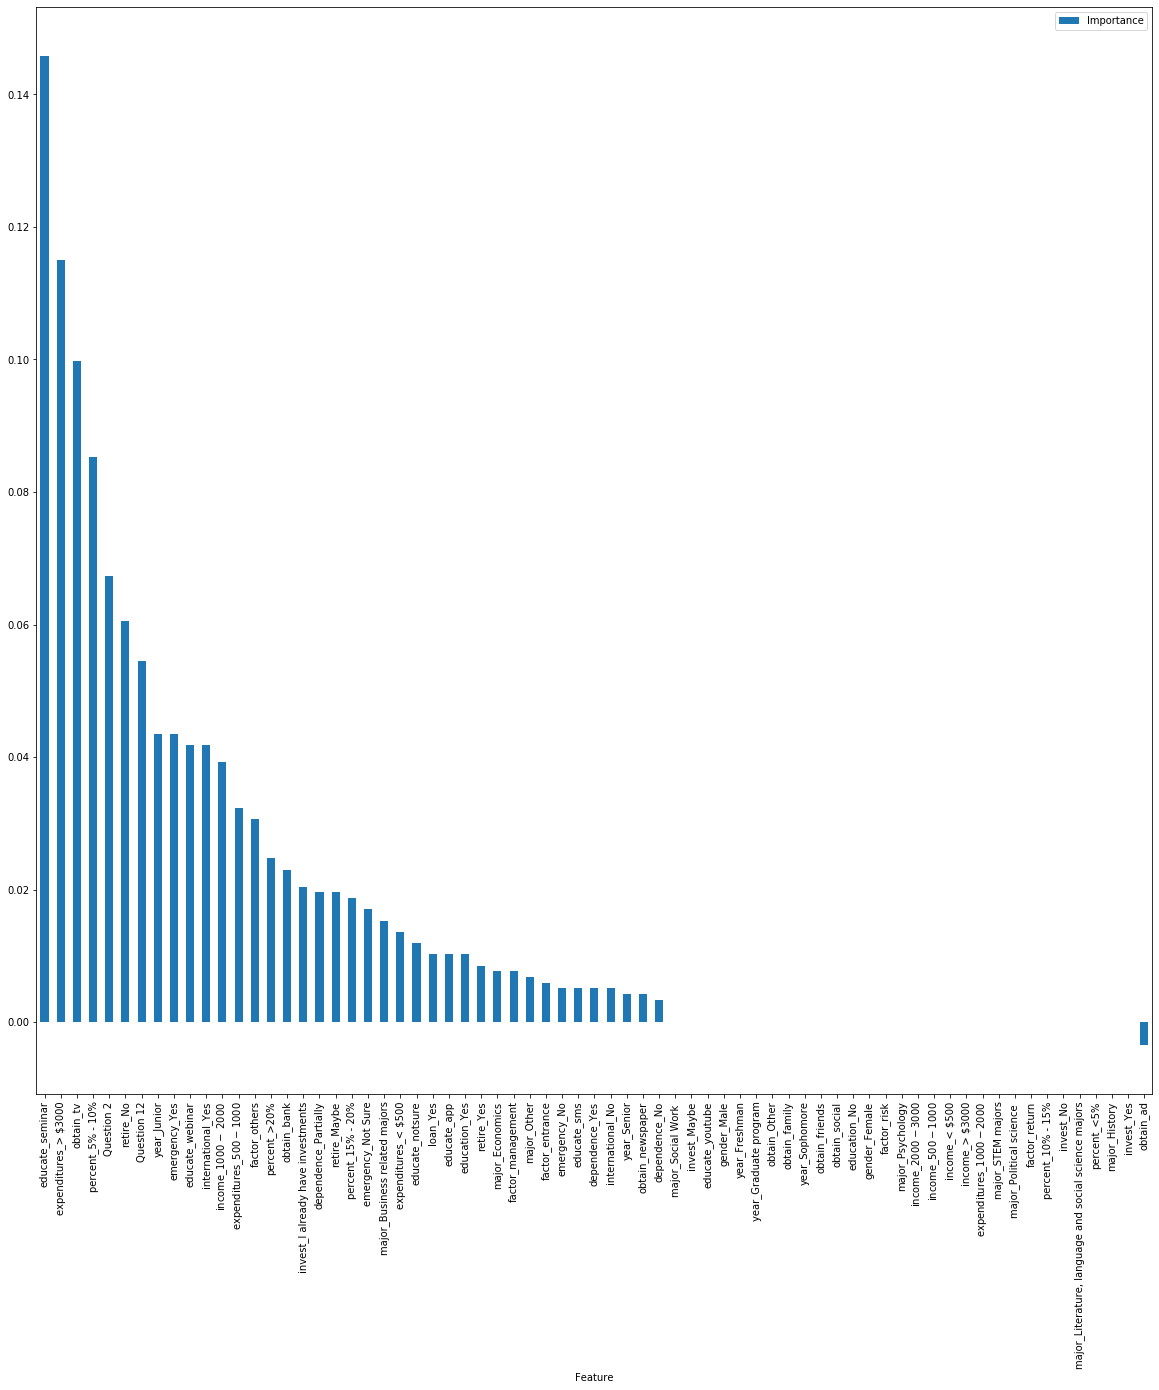

In [187]:
perm_imp_rfpimp = permutation_importances(rf, x_train, y_train, r2)
perm_imp_rfpimp.plot(kind = 'bar',figsize=(20,20))
plt.show()

In [189]:
features_select2 = pd.DataFrame(perm_imp_rfpimp)
features_select2 = features_select2[features_select2['Importance'] > 0.05]
features_select2['Feature'] = features_select2.index
features_select2.index = range(0,7)
features_select2

,Importance,Feature
0,0.145739,educate_seminar
1,0.115057,expenditures_> $3000
2,0.099716,obtain_tv
3,0.085227,percent_5% - 10%
4,0.067330,Question 2
5,0.060511,retire_No
6,0.054545,Question 12


### MACHINE LEARNING WITHOUT FEATURE SELECTION
### 2. dependent variable: if people like high return rate or low return rate products

In [190]:
# due to the small size, we apply SVM as the classifier
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(x_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svc.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svc.score(x_test, y_test)))
pred = svc.predict(x_train)

Accuracy of SVM classifier on training set: 0.73
Accuracy of SVM classifier on test set: 0.81


C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [191]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred)

array([[44,  0],
       [16,  0]], dtype=int64)

In [192]:
# apply linear SVC
from sklearn.svm import LinearSVC
linsvc = LinearSVC()
linsvc.fit(x_train, y_train)
print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(linsvc.score(x_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(linsvc.score(x_test, y_test)))
pred = linsvc.predict(x_train)

Accuracy of SVC classifier on training set: 1.00
Accuracy of SVC classifier on test set: 0.62


In [193]:
# confusion matrix
confusion_matrix(y_train,pred)

array([[44,  0],
       [ 0, 16]], dtype=int64)

In [194]:
# apply random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(rfc.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(rfc.score(x_test, y_test)))
pred = rfc.predict(x_train)

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.75


C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [200]:
# apply linear KNN
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()
knnc.fit(x_train, y_train)
print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(knnc.score(x_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(knnc.score(x_test, y_test)))
pred = knnc.predict(x_train)

Accuracy of SVC classifier on training set: 0.73
Accuracy of SVC classifier on test set: 0.81


In [201]:
# confusion matrix
confusion_matrix(y_train,pred)

array([[42,  2],
       [14,  2]], dtype=int64)

#### apply leave one out cross validation

In [195]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [196]:
loocv = LeaveOneOut()
result = cross_val_score(linsvc, independent_vars, dependent_var, cv=loocv)
print("Accuracy of SVC %.3f%% (standard deviation: %.3f%%)" % (result.mean()*100.0, result.std()*100.0))

Accuracy of SVC 61.842% (standard deviation: 48.577%)


In [197]:
loocv = LeaveOneOut()
result = cross_val_score(rfc, independent_vars, dependent_var, cv=loocv)
print("Accuracy of random forest tree %.3f%% (standard deviation: %.3f%%)" % (result.mean()*100.0, result.std()*100.0))

Accuracy of random forest tree 73.684% (standard deviation: 44.035%)


In [202]:
loocv = LeaveOneOut()
result = cross_val_score(knnc, independent_vars, dependent_var, cv=loocv)
print("Accuracy of random forest tree %.3f%% (standard deviation: %.3f%%)" % (result.mean()*100.0, result.std()*100.0))

Accuracy of random forest tree 64.474% (standard deviation: 47.859%)


### MACHINE LEARNING WITH FEATURE SELECTION

In [209]:
features_cor

,interest_products,features
0,0.274352,year_Junior
1,0.206349,international_No
2,-0.206349,international_Yes
3,-0.286299,retire_No
4,-0.234509,income_$500 - $1000
5,0.284747,expenditures_> $3000
6,1.000000,interest_products
7,-0.248044,obtain_bank


In [213]:
features_cor = features_cor.drop(features_cor.index[6])

In [214]:
x_train = x_train[features_cor['features']]
x_test = x_test[features_cor['features']]
independent_vars_select1 = independent_vars[features_cor['features']]

In [215]:
from sklearn.svm import LinearSVC
linsvc = LinearSVC()
linsvc.fit(x_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(linsvc.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(linsvc.score(x_test, y_test)))
pred = linsvc.predict(x_train)

Accuracy of SVM classifier on training set: 0.83
Accuracy of SVM classifier on test set: 0.94


In [216]:
confusion_matrix(y_train,pred)

array([[43,  1],
       [ 9,  7]], dtype=int64)

In [217]:
loocv = LeaveOneOut()
result = cross_val_score(rfc, independent_vars_select1, dependent_var, cv=loocv)
print("Accuracy: %.3f%% (standard deviation: %.3f%%)" % (result.mean()*100.0, result.std()*100.0))

Accuracy: 80.263% (standard deviation: 39.801%)


In [218]:
## the 2nd feature selection method
features_select2['Feature']

0         educate_seminar
1    expenditures_> $3000
2               obtain_tv
3        percent_5% - 10%
4              Question 2
5               retire_No
6             Question 12
Name: Feature, dtype: object

In [219]:
independent_vars_select2 = independent_vars[features_select2['Feature']]
loocv = LeaveOneOut()
result = cross_val_score(rfc, independent_vars_select2, dependent_var, cv=loocv)
print("Accuracy: %.3f%% (standard deviation: %.3f%%)" % (result.mean()*100.0, result.std()*100.0))

Accuracy: 68.421% (standard deviation: 46.483%)
